# Exemplo de classificação com a base IRIS

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score

## Lendo a base

In [2]:
iris = datasets.load_iris()
#Transformando em dataframe para facilitar a visualizacao
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
iris_df['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

## Distribuição dos dados da IRIS

Plot dos dados em função de três atributos

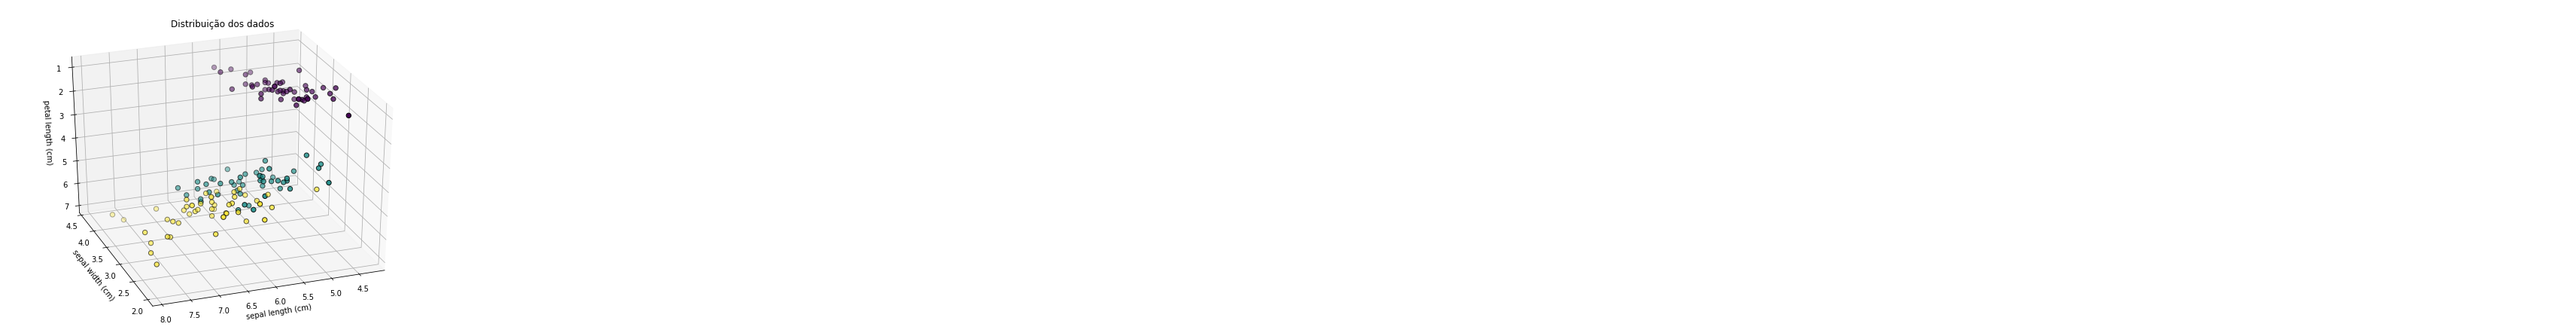

In [4]:
feature_number1 = 0
feature_number2 = 1
feature_number3 = 2

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(iris_df.iloc[:, feature_number1], 
           iris_df.iloc[:, feature_number2], 
           iris_df.iloc[:, feature_number3], 
           c=iris_df.iloc[:, 4],
           edgecolor='k', s=40)
ax.set_title("Distribuição dos dados")
ax.set_xlabel(iris_df.columns[feature_number1])
ax.set_ylabel(iris_df.columns[feature_number2])
ax.set_zlabel(iris_df.columns[feature_number3])

plt.show()

Plot dos dados em função de dois atributos

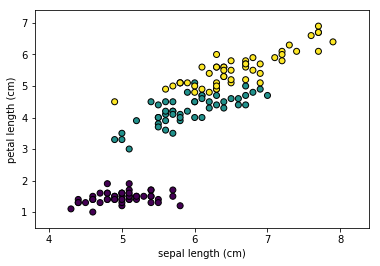

In [5]:
feature_number1 = 0
feature_number2 = 2

plt.scatter(iris_df.iloc[:, feature_number1], 
            iris_df.iloc[:, feature_number2], 
            c=iris_df.iloc[:, 4],
            edgecolor='k')

plt.xlabel(iris.feature_names[feature_number1])
plt.ylabel(iris.feature_names[feature_number2])

plt.xlim(iris_df.iloc[:, feature_number1].min() - 0.5,
         iris_df.iloc[:, feature_number1].max() + 0.5)

plt.ylim(iris_df.iloc[:, feature_number2].min() - 0.5,
         iris_df.iloc[:, feature_number2].max() + 0.5);

## Divisão treino/teste

In [6]:
X = iris_df.iloc[:,0:-1]
Y = iris_df.iloc[:,-1]
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X,
                                            Y,test_size=0.3,
                                            shuffle=True, stratify=Y)
#Quantidade de exemplos de cada classe no conjunto de treino
print('Quantidade de exemplos em cada classe no conjunto de treino')
Y_treino.value_counts()

Quantidade de exemplos em cada classe no conjunto de treino


2    35
1    35
0    35
Name: target, dtype: int64

## Treinando uma MLP

In [7]:
MLP = MLPClassifier(hidden_layer_sizes = (100,100), max_iter = 1000)
MLP.fit(X_treino,Y_treino)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

## Fazendo as predições e calculando a taxa de acerto

In [8]:
valores_preditos_teste = MLP.predict(X_teste)
valores_preditos_treinamento = MLP.predict(X_treino)

acuracia_teste = accuracy_score(Y_teste,
                                valores_preditos_teste)

acuracia_treinamento = accuracy_score(Y_treino,
                                      valores_preditos_treinamento)

kappa_teste = cohen_kappa_score(Y_teste,
                                      valores_preditos_teste)

kappa_treinamento = cohen_kappa_score(Y_treino,
                                      valores_preditos_treinamento)

matriz_confusao_teste = confusion_matrix(Y_teste,
                                         valores_preditos_teste)

print('Acuracia treino = ', acuracia_treinamento)
print('Acuracia teste = ', acuracia_teste)
print('Kappa treino = ', kappa_treinamento)
print('Kappa teste = ', kappa_teste)
print(matriz_confusao_teste)

Acuracia treino =  0.9809523809523809
Acuracia teste =  0.9555555555555556
Kappa treino =  0.9714285714285714
Kappa teste =  0.9333333333333333
[[15  0  0]
 [ 0 13  2]
 [ 0  0 15]]


### Exercício

Treine uma random forest e calcule os resultados de Acurácia e Kappa para o conjunto de treino/teste

# Exemplo de classificação com a base pima-indians-diabetes

In [9]:
dados = pd.read_csv('dados/pima-indians-diabetes.csv')
dados.head()

,# 1. Number of times pregnant,# 2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,# 3. Diastolic blood pressure (mm Hg),# 4. Triceps skin fold thickness (mm),# 5. 2-Hour serum insulin (mu U/ml),# 6. Body mass index (weight in kg/(height in m)^2),# 7. Diabetes pedigree function,# 8. Age (years),# 9. Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
#Contando o número de exemplos de cada classe
dados.iloc[:,-1].value_counts()

0    500
1    268
Name: # 9. Class variable (0 or 1), dtype: int64

## Calculando a correlação 

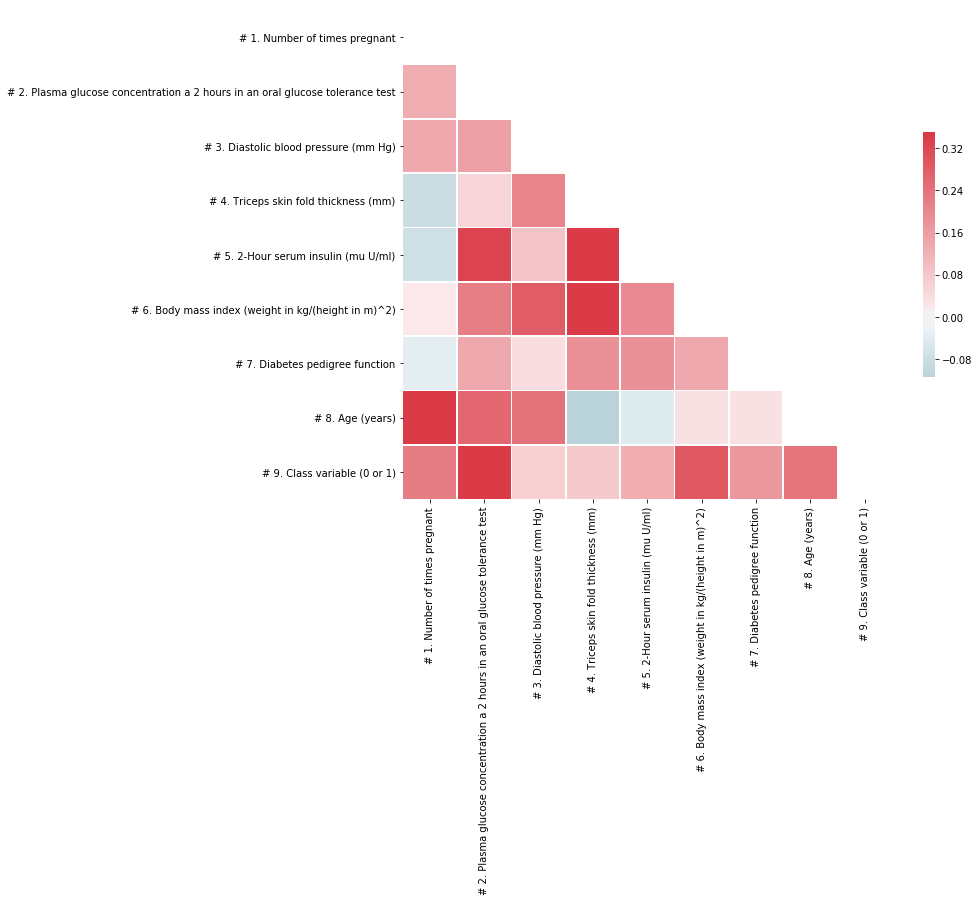

In [11]:
# Compute the correlation matrix
corr = dados.corr()

# Gerando uma mascara para a parte de cima do triangulo
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Criando figura
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Desenhando o heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.35, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Dividindo treino/teste

In [12]:
X = dados.iloc[:,0:-1]
Y = dados.iloc[:,-1]
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X,Y,
                                        test_size=0.3,stratify=Y)
print('Quant de amostras de treino \n', Y_treino.value_counts())
print('\nQuant de amostras de teste \n', Y_teste.value_counts())

Quant de amostras de treino 
 0    350
1    187
Name: # 9. Class variable (0 or 1), dtype: int64

Quant de amostras de teste 
 0    150
1     81
Name: # 9. Class variable (0 or 1), dtype: int64


## Treinando a MLP

In [13]:
MLP = MLPClassifier(hidden_layer_sizes=(1000,100),
                    max_iter=1500,shuffle=True)

MLP.fit(X_treino,Y_treino)
Y_predito = MLP.predict(X_teste)
matriz_confusao = confusion_matrix(Y_predito,Y_teste)
acuracia = accuracy_score(Y_predito,Y_teste)
kappa = cohen_kappa_score(Y_predito,Y_teste)

print(matriz_confusao)
print('Acurácia = ', acuracia)
print('Kappa = ', kappa)

[[70 12]
 [80 69]]
Acurácia =  0.6017316017316018
Kappa =  0.26697019867549676


# Atributos selecionados

In [14]:
X_treino_selecionados = X_treino.iloc[:,[0,1,5,6,7]]
X_teste_selecionado = X_teste.iloc[:,[0,1,5,6,7]]

MLP = MLPClassifier(hidden_layer_sizes=(1000,100),
                    max_iter=1500,shuffle=True)

MLP.fit(X_treino_selecionados,Y_treino)
Y_predito = MLP.predict(X_teste_selecionado)
matriz_confusao = confusion_matrix(Y_predito,Y_teste)
acuracia = accuracy_score(Y_predito,Y_teste)
kappa = cohen_kappa_score(Y_predito,Y_teste)

print(matriz_confusao)
print('Acurácia = ', acuracia)
print('Kappa = ', kappa)

[[86 18]
 [64 63]]
Acurácia =  0.645021645021645
Kappa =  0.3105481546189124


# Normalizando os dados

In [15]:
scaler = preprocessing.MinMaxScaler().fit(X_treino)
X_treino_normalizado = scaler.transform(X_treino)
X_teste_normalizado = scaler.transform(X_teste)

/Users/flavio/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### Exercício

Compare os resultados obtidos pela MLP treinada com os dados normalizados e não normalizados

## Balanceando os dados

### Exercício

Faça o balancemento dos dados de treino replicando os exemplos da classe minoritária. Em seguida, treine novamente a MLP com os dados normalizados e observe o que acontece com os resultados. 